# Image Classification for MNIST dataset
author : marvin sachio 

 The notebook will include code for loading and preprocessing the dataset, defining a neural network architecture, training the model on the MNIST data, and evaluating its performance. This will allow you to accurately classify handwritten digits

## 1. import necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

2024-08-22 07:23:12.254383: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-22 07:23:12.254475: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 07:23:12.391222: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## 2. load the dataset
the dataset are being loaded from the tensorflow built-in dataset
then print out the dataset shape for teach train test images and labels


In [2]:

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


plot some images to see the labels and the images it self

In [3]:
# Plotting a few images from the dataset
def plot_mnist_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 1))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

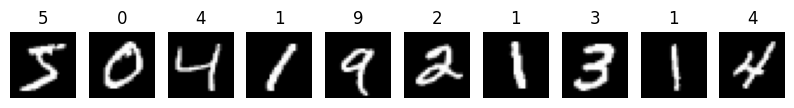

In [4]:
# Plot first 10 images from the training set
plot_mnist_images(train_images, train_labels)

## 2. Creating the models

In [5]:
# CNN model for MNIST data

model = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Pooling layer
    layers.MaxPooling2D((2, 2)),
    # Flatten the results to feed into a dense layer
    layers.Flatten(),
    # Fully connected (dense) layer
    layers.Dense(64, activation='relu'),
    # Output layer
    layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50


2024-08-22 07:23:26.699768: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.35363, expected 1.53764
2024-08-22 07:23:26.699819: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.82107, expected 1.00508
2024-08-22 07:23:26.699834: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.81936, expected 1.00338
2024-08-22 07:23:26.699847: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.23827, expected 1.42229
2024-08-22 07:23:26.699859: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.05481, expected 2.23883
2024-08-22 07:23:26.699870: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.58554, expected 1.76955
2024-08-22 07:23:26.699879: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 3.00002, expected 2.18403
2024-08-22 07:23:26.699891: E external/local_xla/xla/se

  97/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2734 - loss: 2.2201

I0000 00:00:1724311407.834176     102 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724311407.852043     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7625 - loss: 0.8725

2024-08-22 07:23:31.744738: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.34972, expected 1.00161
2024-08-22 07:23:31.744796: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.6774, expected 1.32929
2024-08-22 07:23:31.744807: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.95868, expected 1.61057
2024-08-22 07:23:31.744817: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.69333, expected 1.34521
2024-08-22 07:23:31.744826: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.08558, expected 1.73747
2024-08-22 07:23:31.744835: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 1.59326, expected 1.24515
2024-08-22 07:23:31.744844: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 1.72639, expected 1.37827
2024-08-22 07:23:31.744853: E external/local_xla/xla/ser

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7626 - loss: 0.8719 - val_accuracy: 0.9199 - val_loss: 0.2791
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9227 - loss: 0.2650 - val_accuracy: 0.9424 - val_loss: 0.1977
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9390 - loss: 0.2028 - val_accuracy: 0.9506 - val_loss: 0.1590
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9503 - loss: 0.1632 - val_accuracy: 0.9611 - val_loss: 0.1276
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9600 - loss: 0.1366 - val_accuracy: 0.9616 - val_loss: 0.1210
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9649 - loss: 0.1191 - val_accuracy: 0.9651 - val_loss: 0.1092
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9696 - loss: 0.1012 - val_accuracy: 0.9673 - val_loss: 0.1065
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9715 - loss: 0.0958 - val_accurac

the models here are already convergence to the models can predict the images and the class in good terms

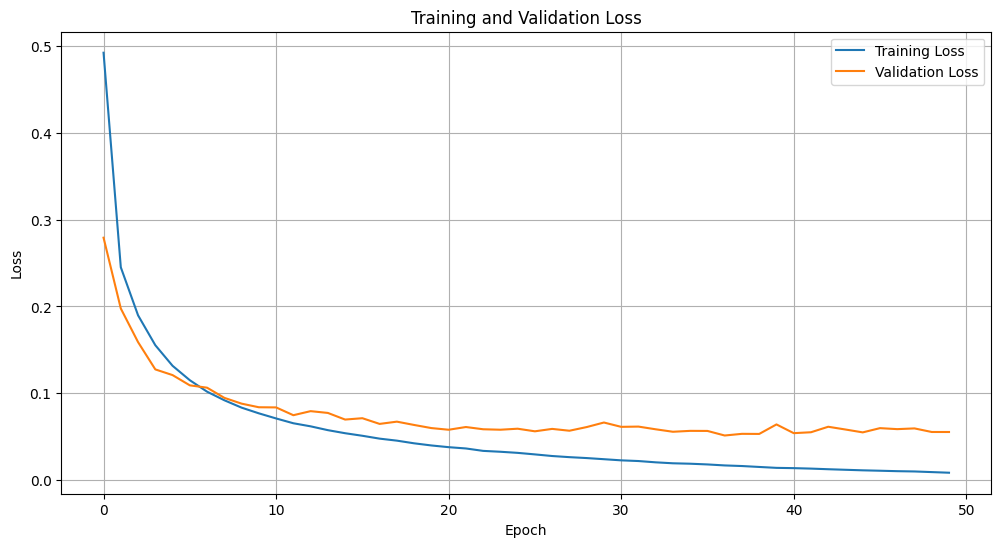

In [7]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9799 - loss: 0.0650
Test accuracy: 0.9825000166893005


with 98% of accuracy and the images plotted below we can say that our model achieve good result 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


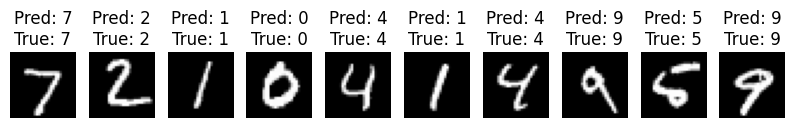

In [9]:
predictions = model.predict(test_images)

# Plot some predictions
def plot_predictions(images, labels, predictions, num_images=10):
    plt.figure(figsize=(10, 1))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Pred: {predictions[i].argmax()}\nTrue: {labels[i]}')
        plt.axis('off')
    plt.show()

plot_predictions(test_images, test_labels, predictions)

In [10]:
# CNN model for MNIST data

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,162 (973.29 KB)

 Trainable params: 249,162 (973.29 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50


2024-08-22 07:26:20.455669: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.67352, expected 0.857533
2024-08-22 07:26:20.455722: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.29495, expected 1.47897
2024-08-22 07:26:20.455732: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.22299, expected 1.40701
2024-08-22 07:26:20.455740: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.79493, expected 0.97894
2024-08-22 07:26:20.455748: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.27216, expected 1.45617
2024-08-22 07:26:20.455756: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.33952, expected 1.52354
2024-08-22 07:26:20.455763: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.27659, expected 1.4606
2024-08-22 07:26:20.455771: E external/local_xla/xla/se

1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5581 - loss: 1.3894

2024-08-22 07:26:27.479678: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.10014, expected 0.752029
2024-08-22 07:26:27.479726: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.23607, expected 0.88796
2024-08-22 07:26:27.479736: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.2616, expected 0.913488
2024-08-22 07:26:27.479744: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.28074, expected 0.932623
2024-08-22 07:26:27.479752: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 0.864034, expected 0.515919
2024-08-22 07:26:27.479760: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.05428, expected 1.70617
2024-08-22 07:26:27.479768: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 1.54678, expected 1.19866
2024-08-22 07:26:27.479776: E external/local_xla/xl

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5595 - loss: 1.3851 - val_accuracy: 0.9575 - val_loss: 0.1395
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9570 - loss: 0.1367 - val_accuracy: 0.9686 - val_loss: 0.0911
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9720 - loss: 0.0887 - val_accuracy: 0.9801 - val_loss: 0.0598
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9795 - loss: 0.0661 - val_accuracy: 0.9736 - val_loss: 0.0814
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9818 - loss: 0.0578 - val_accuracy: 0.9853 - val_loss: 0.0486
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9846 - loss: 0.0502 - val_accuracy: 0.9866 - val_loss: 0.0410
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9869 - loss: 0.0401 - val_accuracy: 0.9845 - val_loss: 0.0495
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9884 - loss: 0.0364 - val_accurac

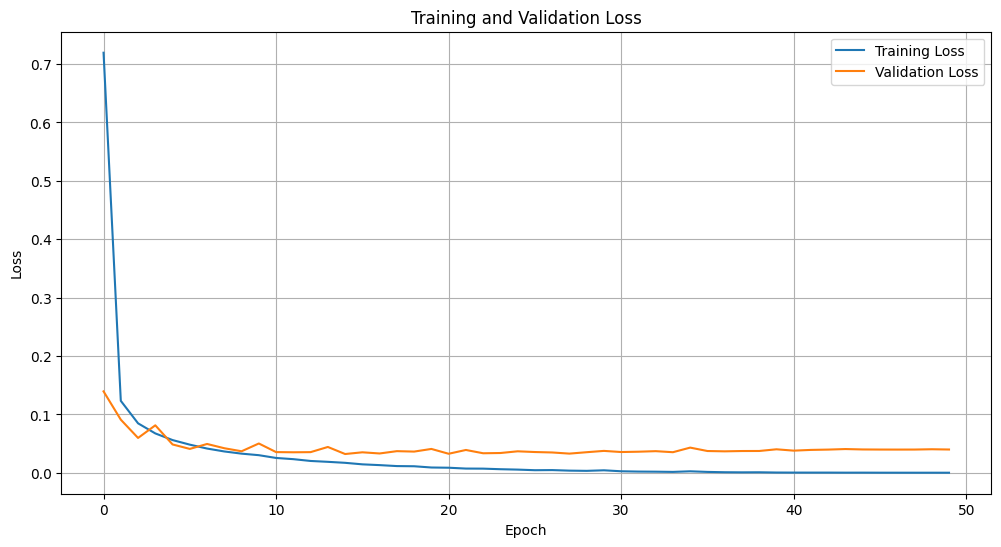

In [12]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

the second model are more deep architecture and show us 99% of accuracy means its better than before as the evaluation are higher

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9883 - loss: 0.0502
Test accuracy: 0.991599977016449


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


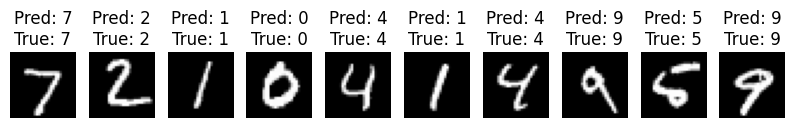

In [14]:
predictions = model.predict(test_images)

# Plot some predictions
def plot_predictions(images, labels, predictions, num_images=10):
    plt.figure(figsize=(10, 1))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Pred: {predictions[i].argmax()}\nTrue: {labels[i]}')
        plt.axis('off')
    plt.show()

plot_predictions(test_images, test_labels, predictions)

In [15]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [16]:
# Find indices where predictions do not match true labels
misclassified_indices = np.where(predicted_labels != test_labels)[0]

here we can see some of the miss classified result from the model this might happen because of the hand writing are similar to other classes so the model cant tell which class its belong to and miss classified

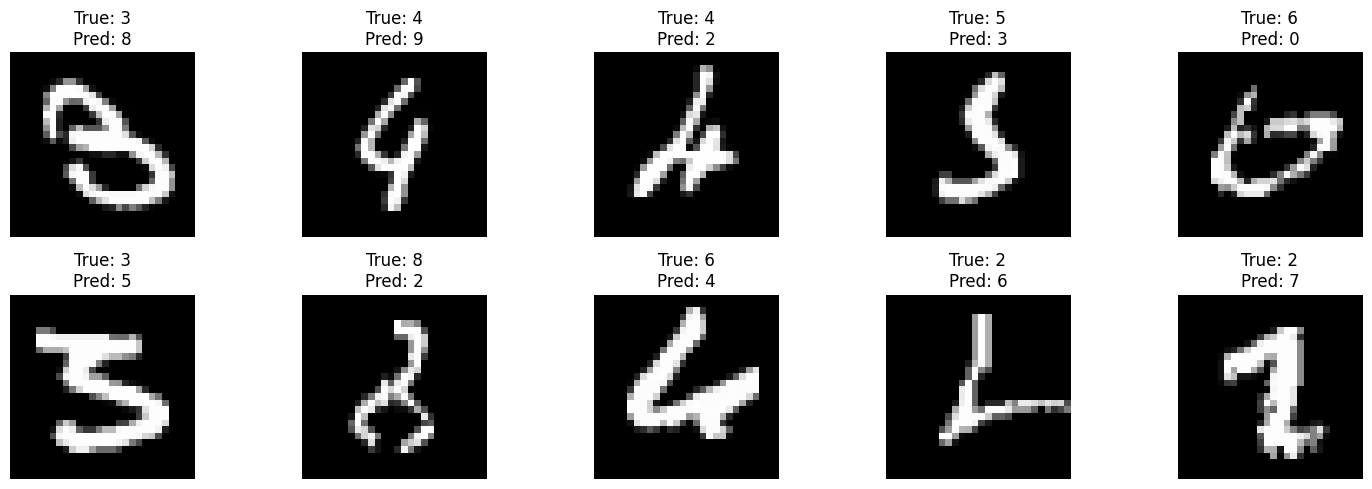

In [17]:
def plot_misclassified_images(images, true_labels, predicted_labels, indices, num_images=10):
    plt.figure(figsize=(15, 5))
    
    for i, index in enumerate(indices[:num_images]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[index].reshape(28, 28), cmap='gray')
        plt.title(f'True: {true_labels[index]}\nPred: {predicted_labels[index]}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot misclassified images
plot_misclassified_images(test_images, test_labels, predicted_labels, misclassified_indices)